# **Fashion Product Recommendation**



> Nama: Berryl Bagas Wirawan


> Bahasa Pemrograman: Python





# Data Understanding

## Introduction to Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
df=pd.read_excel("/content/Dataset_6 - Fashion.xlsx")
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


## Business Problem



1.  Produk pakaian seperti apa yang paling populer bagi pelanggan?
2.  Bagaimana cara untuk memprediksi produk rekomendasi pakaian yang tepat?



# Data Preparation

## Check Missing Value

In [ ]:
df.isnull().sum(axis=0)

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [10]:
df = df.fillna('noname')

## Check Datatype

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


Masih ada beberapa peubah yang memiliki type data object, maka harus diubah ke tipe data numerik atau kategori

In [11]:
def data_types(data):
  nominal = ['Clothing ID','Recommended IND','Division Name','Department Name','Class Name']
  ordinal = ['Age','Rating']

  #convert
  data[nominal] = data[nominal].astype( 'category')
  data[ordinal] = data[ordinal].astype(  'category')


  return data

df = data_types(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Clothing ID              23486 non-null  category
 1   Age                      23486 non-null  category
 2   Title                    23486 non-null  object  
 3   Review Text              23486 non-null  object  
 4   Rating                   23486 non-null  category
 5   Recommended IND          23486 non-null  category
 6   Positive Feedback Count  23486 non-null  int64   
 7   Division Name            23486 non-null  category
 8   Department Name          23486 non-null  category
 9   Class Name               23486 non-null  category
dtypes: category(7), int64(1), object(2)
memory usage: 788.2+ KB


Data siap digunakan untuk EDA

# Exploratory Data Analysis

## Data Describe

In [ ]:
df.describe()

,Positive Feedback Count
count,23486.000000
mean,2.535936
std,5.702202
min,0.000000
25%,0.000000
50%,1.000000
75%,3.000000
max,122.000000


## Positive Feedback (Pakaian)

In [5]:
a = df.groupby(['Class Name']).agg({'Positive Feedback Count':'sum'}).reset_index()
a.sort_values(by='Positive Feedback Count',ascending=False)

,Class Name,Positive Feedback Count
3,Dresses,19510
8,Knits,11598
0,Blouses,8440
13,Pants,3327
17,Sweaters,3154
4,Fine gauge,2215
15,Skirts,2167
7,Jeans,2018
6,Jackets,1990
11,Lounge,1604


Dapat kita lihat bahwa pakaian Dresses merupakan produk yang paling banyak mendapatkan positive feedback, disusul oleh Knits, Blouses dan Pants

## Rating (Pakaian)

In [9]:
a = df.groupby(['Class Name']).agg({'Rating':'mean'}).reset_index()
a.sort_values(by='Rating',ascending=False)

,Class Name,Rating
1,Casual bottoms,4.500000
9,Layering,4.376712
7,Jeans,4.360942
11,Lounge,4.301013
6,Jackets,4.295455
16,Sleep,4.285088
5,Intimates,4.279221
10,Legwear,4.278788
13,Pants,4.265850
4,Fine gauge,4.260909


Rataan rating penjualan produk rentang 3.8 hingga 4.5. Hal tersebut dapat dikatakan rating setiap produk masih cukup baik.

## Most Recommended (Pakaian)

In [7]:
a = df.groupby(['Class Name']).agg({'Recommended IND':'sum'}).reset_index()
a.sort_values(by='Recommended IND',ascending=False)

,Class Name,Recommended IND
3,Dresses,5107
8,Knits,3960
0,Blouses,2509
13,Pants,1156
17,Sweaters,1143
7,Jeans,1011
4,Fine gauge,921
15,Skirts,799
6,Jackets,595
11,Lounge,594


Dresses, Knits dan Blouses mejadi pakaian yang paling sering muncul sebagai produk rekomendasi

# Data Preprocessing

## Encoder

In [7]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,noname,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,noname,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [12]:
def handling_preprocessing(data):

  # (nominal)
  data = pd.get_dummies(data, columns=['Division Name'])
  data = pd.get_dummies(data, columns=['Department Name'])
  data = pd.get_dummies(data, columns=['Class Name'])

  return data
df = handling_preprocessing(df)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name_General,Division Name_General Petite,Division Name_Initmates,Division Name_noname,Department Name_Bottoms,Department Name_Dresses,Department Name_Intimate,Department Name_Jackets,Department Name_Tops,Department Name_Trend,Department Name_noname,Class Name_Blouses,Class Name_Casual bottoms,Class Name_Chemises,Class Name_Dresses,Class Name_Fine gauge,Class Name_Intimates,Class Name_Jackets,Class Name_Jeans,Class Name_Knits,Class Name_Layering,Class Name_Legwear,Class Name_Lounge,Class Name_Outerwear,Class Name_Pants,Class Name_Shorts,Class Name_Skirts,Class Name_Sleep,Class Name_Sweaters,Class Name_Swim,Class Name_Trend,Class Name_noname
0,767,33,noname,Absolutely wonderful - silky and sexy and comf...,4,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1080,34,noname,Love this dress! it's sooo pretty. i happene...,5,1,4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Train Test Split Data

In [13]:
from sklearn.model_selection import train_test_split

cols_X = ['Age','Positive Feedback Count','Division Name_General','Division Name_General Petite',	'Division Name_Initmates',	'Division Name_noname',
          'Department Name_Bottoms',	'Department Name_Dresses',	'Department Name_Intimate',	'Department Name_Jackets',	'Department Name_Tops',
          'Department Name_Trend',	'Department Name_noname','Rating'] 
cols_Y = ['Recommended IND']

X = df[cols_X]
y = df[cols_Y]

x_train, x_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 123)

## Imbalance data

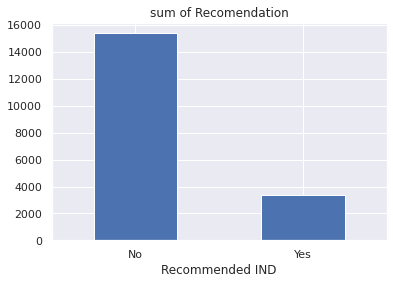

In [ ]:
y_train.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('sum of Recomendation')
sns.set_theme()

In [14]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 1)
x_smote, y_smote = smote.fit_resample(x_train,y_train)

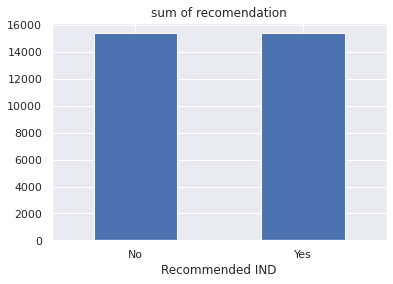

In [ ]:
y_smote.value_counts().plot(kind='bar')
plt.xticks([0,1],['No','Yes'], rotation=0)
plt.title('sum of recomendation')
sns.set_theme()

# Data Modeling

## Model Train-Testing

In [15]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score

In [16]:
ad =  AdaBoostClassifier()
ad.fit(x_smote,y_smote) 
y_jawaban = ad.predict(x_test)
ad1 = precision_score(y_test,y_jawaban)
ad2 = recall_score(y_test,y_jawaban)
ad3 = f1_score(y_test,y_jawaban)
ad4 = accuracy_score(y_test,y_jawaban)

lr =  LogisticRegression()
lr.fit(x_smote,y_smote) 
y_jawaban = lr.predict(x_test)
lr1 = precision_score(y_test,y_jawaban)
lr2 = recall_score(y_test,y_jawaban)
lr3 = f1_score(y_test,y_jawaban)
lr4 = accuracy_score(y_test,y_jawaban)

sdg =  SGDClassifier()
sdg.fit(x_smote,y_smote) 
y_jawaban = sdg.predict(x_test)
sdg1 = precision_score(y_test,y_jawaban)
sdg2 = recall_score(y_test,y_jawaban)
sdg3 = f1_score(y_test,y_jawaban)
sdg4 = accuracy_score(y_test,y_jawaban)

lv =  LinearSVC()
lv.fit(x_smote,y_smote) 
y_jawaban = lv.predict(x_test)
lv1 = precision_score(y_test,y_jawaban)
lv2 = recall_score(y_test,y_jawaban)
lv3 = f1_score(y_test,y_jawaban)
lv4 = accuracy_score(y_test,y_jawaban)

sv =  SVC()
sv.fit(x_smote,y_smote) 
y_jawaban = sv.predict(x_test)
sv1 = precision_score(y_test,y_jawaban)
sv2 = recall_score(y_test,y_jawaban)
sv3 = f1_score(y_test,y_jawaban)
sv4 = accuracy_score(y_test,y_jawaban)

knn =  KNeighborsClassifier()
knn.fit(x_smote,y_smote) 
y_jawaban = knn.predict(x_test)
knn1 = precision_score(y_test,y_jawaban)
knn2 = recall_score(y_test,y_jawaban)
knn3 = f1_score(y_test,y_jawaban)
knn4 = accuracy_score(y_test,y_jawaban)

nc =  NearestCentroid()
nc.fit(x_smote,y_smote) 
y_jawaban = nc.predict(x_test)
nc1 = precision_score(y_test,y_jawaban)
nc2 = recall_score(y_test,y_jawaban)
nc3 = f1_score(y_test,y_jawaban)
nc4 = accuracy_score(y_test,y_jawaban)

rf =  RandomForestClassifier()
rf.fit(x_smote,y_smote) 
y_jawaban = rf.predict(x_test)
rf1 = precision_score(y_test,y_jawaban)
rf2 = recall_score(y_test,y_jawaban)
rf3 = f1_score(y_test,y_jawaban)
rf4 = accuracy_score(y_test,y_jawaban)

gb =  GradientBoostingClassifier()
gb.fit(x_smote,y_smote) 
y_jawaban = gb.predict(x_test)
gb1 = precision_score(y_test,y_jawaban)
gb2 = recall_score(y_test,y_jawaban)
gb3 = f1_score(y_test,y_jawaban)
gb4 = accuracy_score(y_test,y_jawaban)

dt =  DecisionTreeClassifier()
dt.fit(x_smote,y_smote) 
y_jawaban = dt.predict(x_test)
dt1 = precision_score(y_test,y_jawaban)
dt2 = recall_score(y_test,y_jawaban)
dt3 = f1_score(y_test,y_jawaban)
dt4 = accuracy_score(y_test,y_jawaban)

ml =  MLPClassifier()
ml.fit(x_smote,y_smote) 
y_jawaban = ml.predict(x_test)
ml1 = precision_score(y_test,y_jawaban)
ml2 = recall_score(y_test,y_jawaban)
ml3 = f1_score(y_test,y_jawaban)
ml4 = accuracy_score(y_test,y_jawaban)

In [17]:
dic = {'Model':['LogisticRegression','SGDClassifier','LinearSVC','SVC','KNeighborsClassifier','NearestCentroid','RandomForestClassifier',
                'GradientBoostingClassifier','AdaBoostClassifier','DecisionTreeClassifier','MLPClassifier'],
       'Precision':[lr1,sdg1,lv1,sv1,knn1,nc1,rf1,gb1,ad1,dt1,ml1],
       'Recall':[lr2,sdg2,lv2,sv2,knn2,nc2,rf2,gb2,ad2,dt2,ml2],
       'F1':[lr3,sdg3,lv3,sv3,knn3,nc3,rf3,gb3,ad3,dt3,ml3],
       'Accuracy':[lr4,sdg4,lv4,sv4,knn4,nc4,rf4,gb4,ad4,dt4,ml4]}
compare = pd.DataFrame(dic)
compare.sort_values(by='Accuracy',ascending=False)

,Model,Precision,Recall,F1,Accuracy
7,GradientBoostingClassifier,0.988102,0.937885,0.962339,0.939114
8,AdaBoostClassifier,0.988100,0.937714,0.962248,0.938972
10,MLPClassifier,0.985463,0.939596,0.961983,0.938405
2,LinearSVC,0.981435,0.940794,0.960685,0.936134
6,RandomForestClassifier,0.970903,0.947810,0.959217,0.933154
9,DecisionTreeClassifier,0.969420,0.943874,0.956477,0.928754
4,KNeighborsClassifier,0.970869,0.940965,0.955683,0.927619
1,SGDClassifier,0.829407,1.000000,0.906749,0.829407
3,SVC,0.829407,1.000000,0.906749,0.829407
5,NearestCentroid,0.829407,1.000000,0.906749,0.829407


Model awal yang memiliki accuracy paling tinggi yaitu:
 

*   AdaBoostClassifier	
*   GradientBoostingClassifier

# Tuning Hyperparameter

Selajutnya saya akan memilih 2 model awal dengan nilai Accuracy tertinggi (LogisticRegression dan GradientBoostingClassifier) untuk dilakukannya Tuning Hyperparameter 

## Model Tuning Train-Test

In [31]:
ad =  AdaBoostClassifier()
ad.fit(x_smote,y_smote) 
y_jawaban = ad.predict(x_test)
ad1 = precision_score(y_test,y_jawaban)
ad2 = recall_score(y_test,y_jawaban)
ad3 = f1_score(y_test,y_jawaban)
ad4 = accuracy_score(y_test,y_jawaban)

gridad =  AdaBoostClassifier(n_estimators=1000,learning_rate=0.1)
gridad.fit(x_smote,y_smote) 
y_jawaban = gridad.predict(x_test)
gridad1 = precision_score(y_test,y_jawaban)
gridad2 = recall_score(y_test,y_jawaban)
gridad3 = f1_score(y_test,y_jawaban)
gridad4 = accuracy_score(y_test,y_jawaban)

gb =  GradientBoostingClassifier()
gb.fit(x_smote,y_smote) 
y_jawaban = gb.predict(x_test)
gb1 = precision_score(y_test,y_jawaban)
gb2 = recall_score(y_test,y_jawaban)
gb3 = f1_score(y_test,y_jawaban)
gb4 = accuracy_score(y_test,y_jawaban)

gridgb =  GradientBoostingClassifier(n_estimators=1000,learning_rate=0.1)
gridgb.fit(x_smote,y_smote) 
y_jawaban = gridgb.predict(x_test)
gridgb1 = precision_score(y_test,y_jawaban)
gridgb2 = recall_score(y_test,y_jawaban)
gridgb3 = f1_score(y_test,y_jawaban)
gridgb4 = accuracy_score(y_test,y_jawaban)


dic = {'Model':['AdaBoostClassifier','Tuning AdaBoostClassifier','GradientBoostingClassifier','Tuning GradientBoostingClassifier'],
       'Precision':[ad1,gridad1,gb1,gridgb1],
       'Recall':[ad2,gridad2,gb2,gridgb2],
       'F1':[ad3,gridad3,gb3,gridgb3],
       'Accuracy':[ad4,gridad4,gb4,gridgb4]}
compare = pd.DataFrame(dic)
compare

,Model,Precision,Recall,F1,Accuracy
0,AdaBoostClassifier,0.988100,0.937714,0.962248,0.938972
1,Tuning AdaBoostClassifier,0.988100,0.937714,0.962248,0.938972
2,GradientBoostingClassifier,0.988102,0.937885,0.962339,0.939114
3,Tuning GradientBoostingClassifier,0.981792,0.941136,0.961034,0.936702


Model tanpa tuning cendrung lebih baik karena memberikan akurasi yang lebih besar

# Model Evaluation

In [19]:
ad =  AdaBoostClassifier()
ad.fit(x_smote,y_smote) 
y_jawaban = ad.predict(x_test)
ad1 = precision_score(y_test,y_jawaban)
ad2 = recall_score(y_test,y_jawaban)
ad3 = f1_score(y_test,y_jawaban)
ad4 = accuracy_score(y_test,y_jawaban)

gridad =  AdaBoostClassifier()
gridad.fit(x_smote,y_smote) 
y_jawaban = gridad.predict(x_train)
gridad1 = precision_score(y_train,y_jawaban)
gridad2 = recall_score(y_train,y_jawaban)
gridad3 = f1_score(y_train,y_jawaban)
gridad4 = accuracy_score(y_train,y_jawaban)

gb =  GradientBoostingClassifier()
gb.fit(x_smote,y_smote) 
y_jawaban = gb.predict(x_test)
gb1 = precision_score(y_test,y_jawaban)
gb2 = recall_score(y_test,y_jawaban)
gb3 = f1_score(y_test,y_jawaban)
gb4 = accuracy_score(y_test,y_jawaban)

gridgb =  GradientBoostingClassifier()
gridgb.fit(x_smote,y_smote) 
y_jawaban = gridgb.predict(x_train)
gridgb1 = precision_score(y_train,y_jawaban)
gridgb2 = recall_score(y_train,y_jawaban)
gridgb3 = f1_score(y_train,y_jawaban)
gridgb4 = accuracy_score(y_train,y_jawaban)


dic = {'Model':['AdaBoostClassifier','AdaBoostClassifier','GradientBoostingClassifier','GradientBoostingClassifier'],
       'Data':['Testing','Training','Testing','Training'],
       'Precision':[ad1,gridad1,gb1,gridgb1],
       'Recall':[ad2,gridad2,gb2,gridgb2],
       'F1':[ad3,gridad3,gb3,gridgb3],
       'Accuracy':[ad4,gridad4,gb4,gridgb4]}
compare = pd.DataFrame(dic)
compare

,Model,Data,Precision,Recall,F1,Accuracy
0,AdaBoostClassifier,Testing,0.988100,0.937714,0.962248,0.938972
1,AdaBoostClassifier,Training,0.989970,0.930586,0.959360,0.935401
2,GradientBoostingClassifier,Testing,0.988102,0.937885,0.962339,0.939114
3,GradientBoostingClassifier,Training,0.989897,0.931106,0.959602,0.935766


Kedua model tersebut tidak memberikan selisih yang besar antara data test dan train

# Predict Data

## Predict using GraidentBoostingClassifier

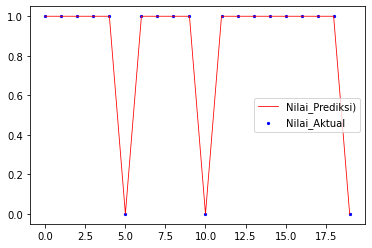

In [20]:
gb =  GradientBoostingClassifier()
gb.fit(x_smote,y_smote) 
y_jawaban = gb.predict(x_test.head(20))
x_ax = range(len(x_test.head(20)))
plt.scatter(x_ax, y_test.head(20), s=5, color="blue", label="Nilai_Aktual")
plt.plot(x_ax, y_jawaban, lw=0.8, color="red", label="Nilai_Prediksi)")
plt.legend()
plt.show()

In [21]:
b = y_test.head(20).reset_index()
b.drop('index',axis=1,inplace=True)
b= b.rename(columns={'Recommended IDN':'Nilai_Aktual'})
c = pd.DataFrame(y_jawaban)
c= c.rename(columns={0:'Nilai_Prediksi'})
predict = [b,c]
predict = pd.concat(predict,axis=1,join='inner')
predict

,Recommended IND,Nilai_Prediksi
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


Model GradientBoostingClassifier mampu memprediksi benar 100% untuk 20 data pertama.

## Predict using AdaBoostClassifier

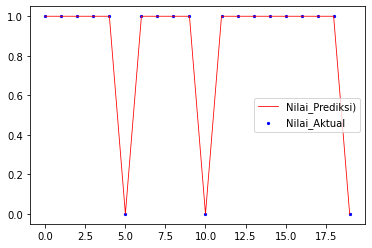

In [23]:
ad =  AdaBoostClassifier()
ad.fit(x_smote,y_smote) 
y_jawaban = ad.predict(x_test.head(20))
x_ax = range(len(x_test.head(20)))
plt.scatter(x_ax, y_test.head(20), s=5, color="blue", label="Nilai_Aktual")
plt.plot(x_ax, y_jawaban, lw=0.8, color="red", label="Nilai_Prediksi)")
plt.legend()
plt.show()

In [24]:
b = y_test.head(20).reset_index()
b.drop('index',axis=1,inplace=True)
b= b.rename(columns={'Recommended IDN':'Nilai_Aktual'})
c = pd.DataFrame(y_jawaban)
c= c.rename(columns={0:'Nilai_Prediksi'})
predict = [b,c]
predict = pd.concat(predict,axis=1,join='inner')
predict

,Recommended IND,Nilai_Prediksi
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,1,1


Model AdaBoosClassifier mampu memprediksi benar 100% untuk 20 data pertama.

# Kesimpulan

Dari hasil analisis deskriptif dapat kita simpulkan produk pakaian dresses, knits dan blouse merupakan produk yang paling sering muncul untuk produk rekomendasi dan 3 produk tersebut paling banyak menerima positif feedback.

Model Gradient Boosting Classifier dan Ada Boost Classifier memberikan nilai accuracy yang baik pada data test, yaitu masing-masing sebesar 93,91% dan 93,89%. Artinya dari 23486 data, model Gradient Boosting Classifier mampu memprediksi benar sebesar 22055 dan prediksi salah 1431.